In [19]:
# Base import

import imutils
import cv2
from imutils import contours

import numpy as np
import PIL

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def excise_segmentation(image):
    
    resized = imutils.resize(excise_src, height=500)
    gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
    equ = cv2.equalizeHist(gray)
    blurred = cv2.GaussianBlur(gray, (3, 3), 0)
    _, thresholded = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    # thresholded = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
 
    # return the segmentationed image
    return thresholded

Total function and timings
Wall time: 47.4 ms


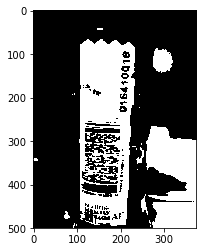

In [20]:
print("Total function and timings")
excise_src = cv2.imread("test_data/IMG_0307.JPG")

%time thresholded = excise_segmentation(excise_src)

plt.imshow(cv2.cvtColor(thresholded, cv2.COLOR_GRAY2RGB))

### Find contours in the excise (i.e,. the outlines of the characters) and sort them from left to right
### Without size filter

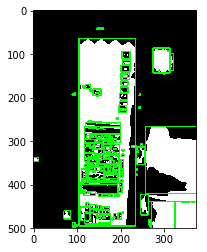

In [31]:
edged = cv2.Canny(thresholded, 30, 200)
width, height = thresholded.shape[:2]

refCnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
refCnts = refCnts[0] if imutils.is_cv2() else refCnts[1]
refCnts = contours.sort_contours(refCnts, method="left-to-right")[0]
 
# create a clone of the original image so we can draw on it
clone = np.dstack([thresholded.copy()] * 3)
 
# loop over the (sorted) contours
for c in refCnts:
    # compute the bounding box of the contour and draw it on our
    # image
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(clone, (x, y), (x + w, y + h), (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(clone, cv2.COLOR_BGR2RGB))

### With size filter

Contour count: 61


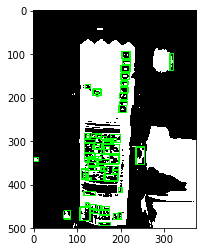

In [49]:
clone = np.dstack([thresholded.copy()] * 3)
CntsCount = 0

for c in refCnts:
    (x, y, w, h) = cv2.boundingRect(c)
    if ((w < width / 9) and (h < height / 9 ) and (w > 6) and (h > 6)): # 9 digits in serial
        CntsCount += 1
        cv2.rectangle(clone, (x, y), (x + w, y + h), (0, 255, 0), 2)

print("Contour count: " + str(CntsCount))
plt.imshow(cv2.cvtColor(clone, cv2.COLOR_BGR2RGB))